In [1]:
%load_ext autoreload
%autoreload 2

import copy
import matplotlib.pyplot as plt



In [2]:
N = 1000
INIT_EXPOSED = int(N*0.5)

from seirsplus.networks import generate_demographic_contact_network, household_country_data

demographic_graphs, individual_ageGroups, households = generate_demographic_contact_network(
                                                            N=N, demographic_data=household_country_data('US'), 
                                                            distancing_scales=[0.7], isolation_groups=[])

G_baseline   = demographic_graphs['baseline']
G_quarantine = demographic_graphs['distancingScale0.7']

households_indices = [household['indices'] for household in households]

Generated overall age distribution:
0-9: 0.1060	(-0.0150 from target)
10-19: 0.1140	(-0.0170 from target)
20-29: 0.1240	(-0.0130 from target)
30-39: 0.1310	(-0.0020 from target)
40-49: 0.1320	(0.0080 from target)
50-59: 0.1440	(0.0130 from target)
60-69: 0.1400	(0.0250 from target)
70-79: 0.0780	(0.0080 from target)
80+: 0.0310	(-0.0070 from target)

Generated household size distribution:
1: 0.2771	(-0.0066 from target)
2: 0.3831	(0.0380 from target)
3: 0.1325	(-0.0181 from target)
4: 0.1181	(-0.0096 from target)
5: 0.0554	(-0.0024 from target)
6: 0.0169	(-0.0058 from target)
7: 0.0169	(0.0044 from target)
Num households: 415
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...


/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


Generating graph for 20-59...
Generating graph for 60+...


In [40]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel

from seirsplus.sim_loops_pooled_test import SimulationRunner

# don't know why but have to create it every time
test_model = ViralExtSEIRNetworkModel(
    G = G_baseline,
    beta = 0.1,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    initE = INIT_EXPOSED)

sim_naive = SimulationRunner(
    model=copy.copy(test_model),
    pooling_strategy='naive',
    T = 50,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    save_results = False
)

sim_naive.run_simulation()

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)
Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Number of individuals')

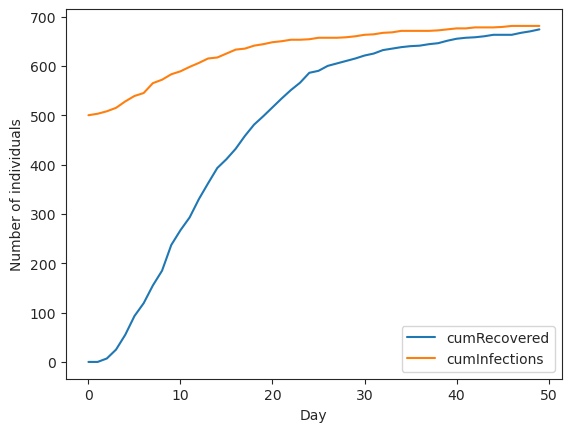

In [41]:
cumRecovered = [res["cumRecovered"] for res in sim_naive.overall_results]
cumInfections = [res["cumInfections"] for res in sim_naive.overall_results]

plt.plot(cumRecovered, label = "cumRecovered")
plt.plot(cumInfections, label = "cumInfections")

plt.legend()
plt.xlabel("Day")
plt.ylabel("Number of individuals")

Text(0.5, 1.0, 'Median and quartiles of number of positives in pool')

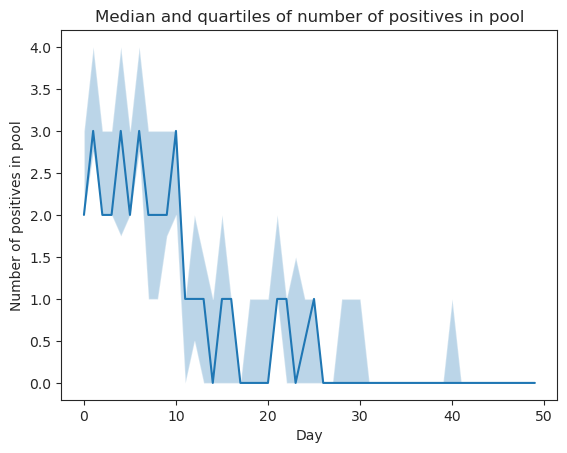

In [42]:
plt.plot(
    [res["num_positives_in_pool_median"] for res in sim_naive.overall_results]
)
plt.fill_between(
    range(len(sim_naive.overall_results)),
    [res["num_positives_in_pool_1st_quartile"] for res in sim_naive.overall_results],
    [res["num_positives_in_pool_3rd_quartile"] for res in sim_naive.overall_results],
    alpha=0.3
)
plt.xlabel("Day")
plt.ylabel("Number of positives in pool")
plt.title("Median and quartiles of number of positives in pool")


/home/yz685/corr_pooling_seirsplus/seirsplus/models.py:3117: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


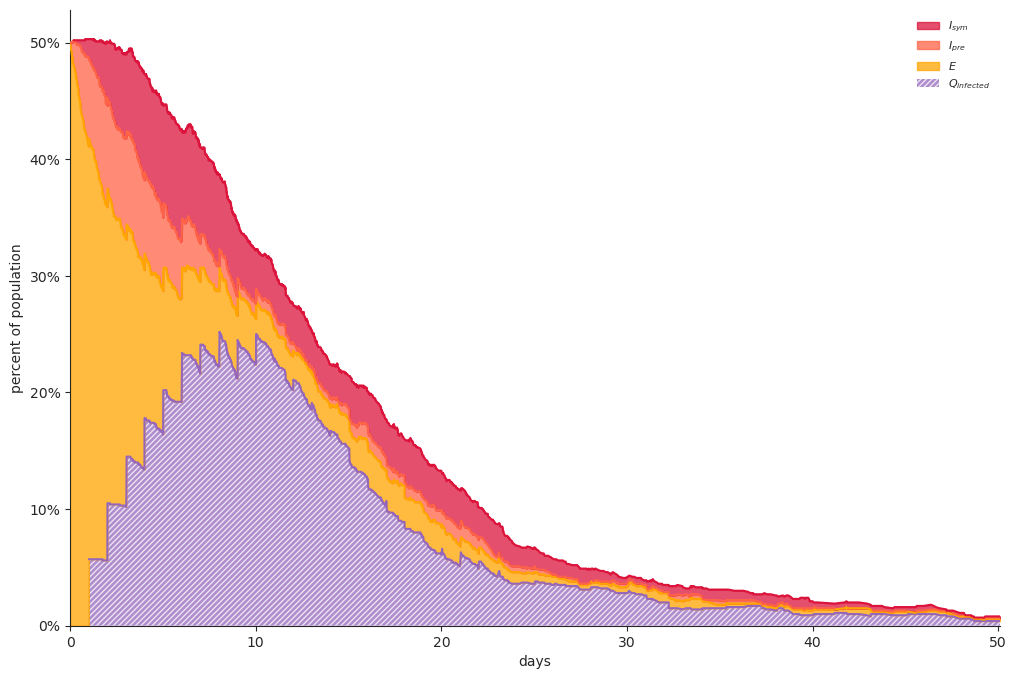

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='percent of population'>)

In [43]:
sim_naive.model.figure_infections()